# Data Segmentation & Spectrum Analysis

## Tasks

- [ ] Import `.wav` files.
- [ ] Segment.
- [ ] Generate spectrograms.
    - [ ] Output spectrograms.
- [ ] Generate mel cepstrum plot.
    - [ ] Output mel cepstrum plots.

In [20]:
# IMPORT BOX #
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy.io

from scipy import signal
from scipy.fft import fftshift

ModuleNotFoundError: No module named 'librosa'

In [5]:
def segment_audio(FS, waves, pad=.1):
    num_samples = int(len(waves)/FS) # Assuming one per second.
    wave = (waves[:,0] + waves[:,1])*0.5
    sample_list = []
    
    for i in range(num_samples):
        wave_start = int(i*FS+pad*FS)
        wave_end = int((i+1)*FS-pad*FS)
        sample_list.append(wave[wave_start:wave_end])

    return sample_list

In [44]:
def get_spectrum(sample_list, FS):
    spectrum_list = []
    
    for sample in sample_list:
        f, t, Sxx = signal.spectrogram(sample, FS)
        plt.pcolormesh(t, f, Sxx, shading='gouraud')
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [sec]')
        plt.show()
        spectrum_list.append(Sxx)
    
    return spectrum_list

In [45]:
def get_spectrum_dataset(file_path, pad=0.4):
    FS, audio = wavfile.read(file_path)
    
    segments = segment_audio(FS, audio, pad=pad)
    output = get_spectrum(segments, FS)
    
    return output

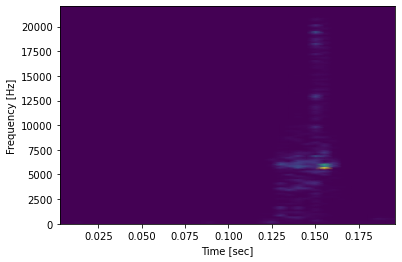

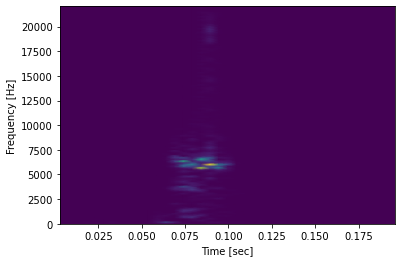

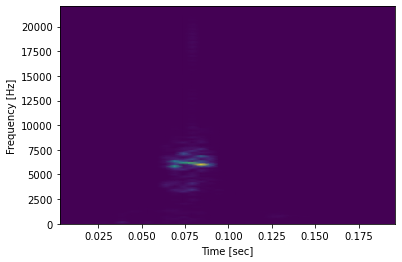

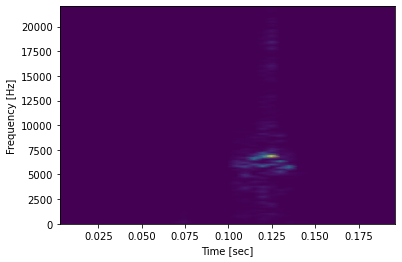

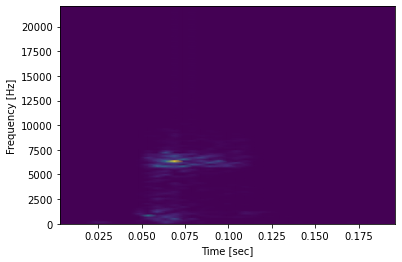

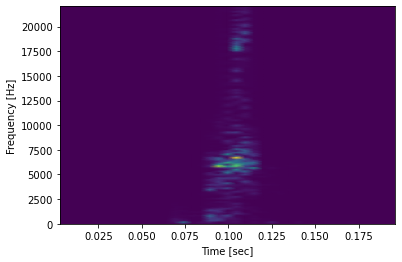

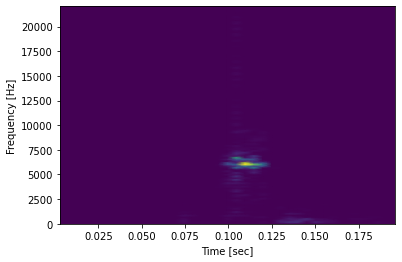

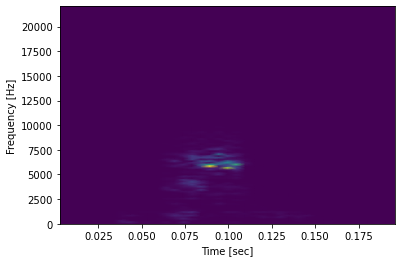

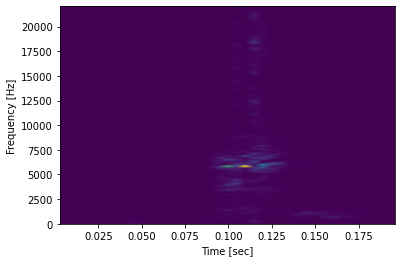

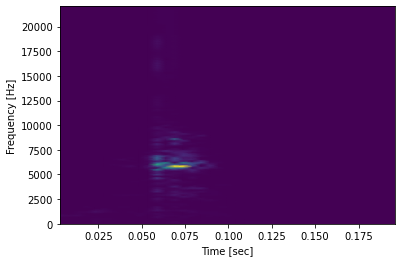

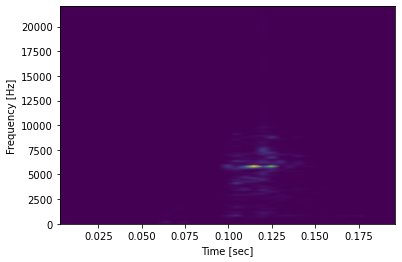

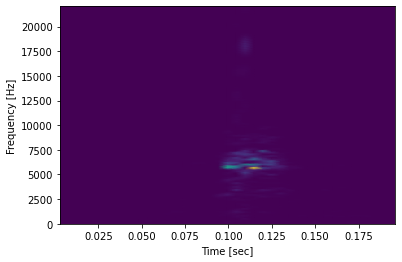

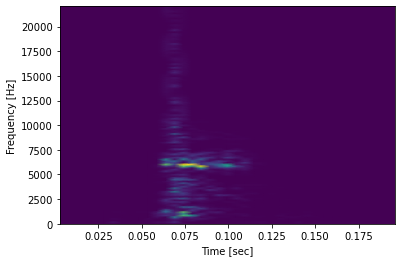

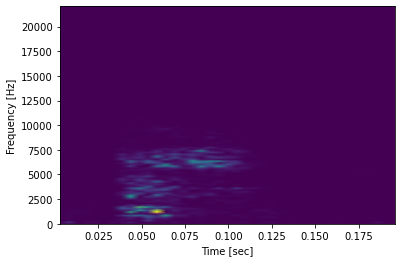

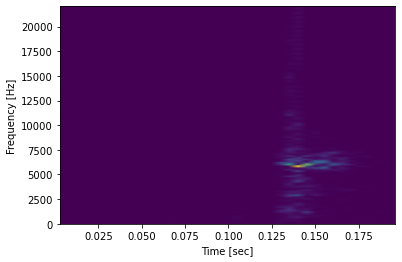

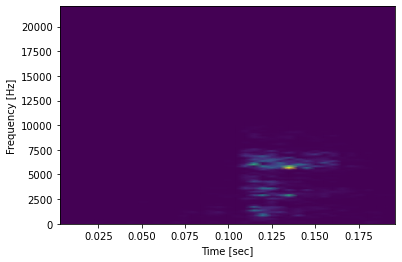

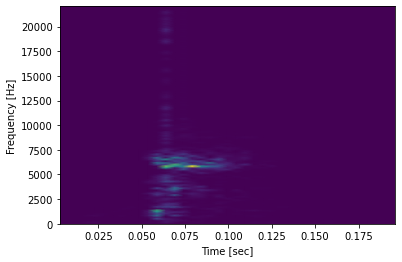

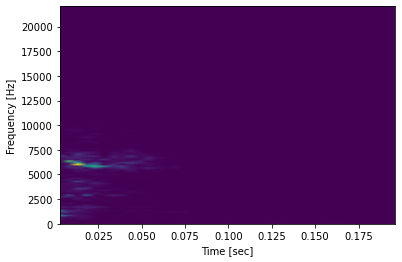

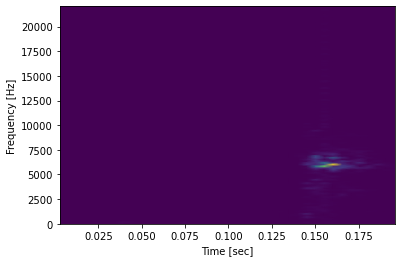

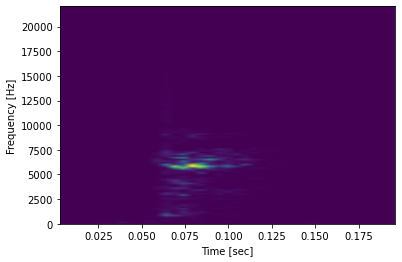

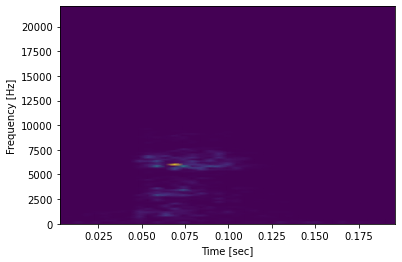

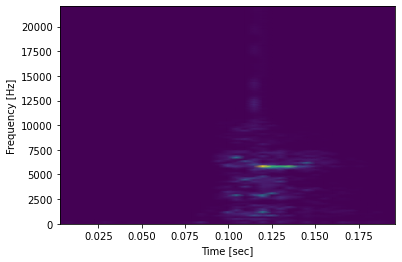

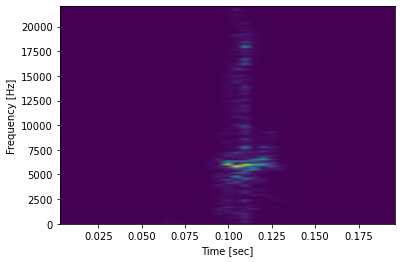

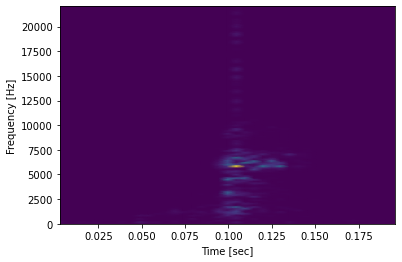

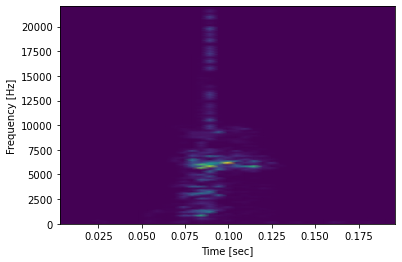

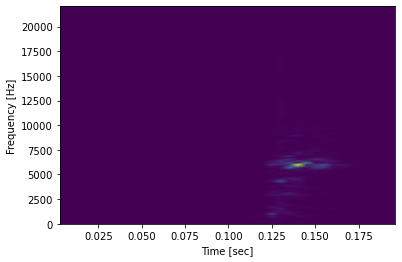

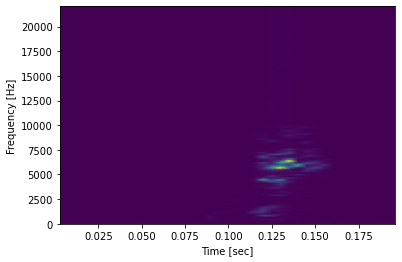

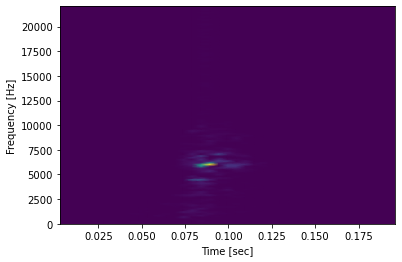

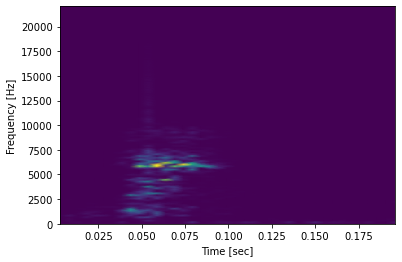

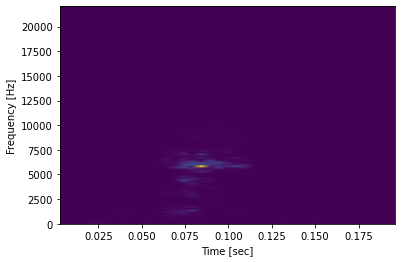

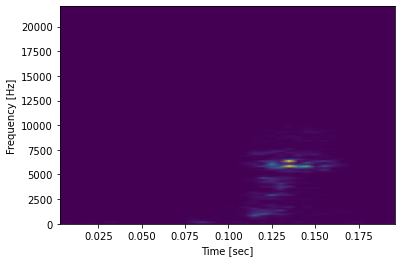

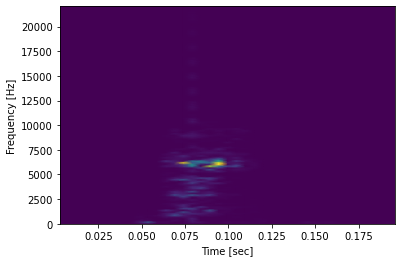

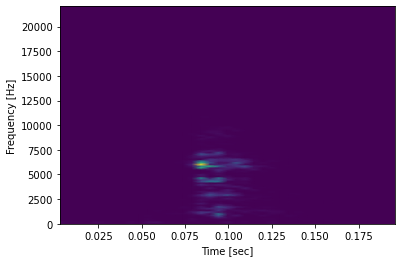

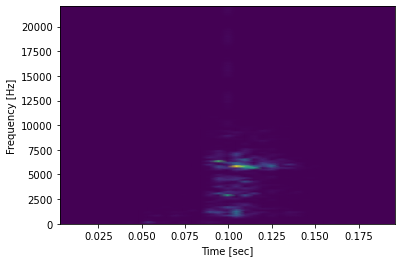

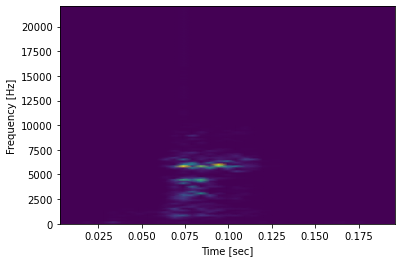

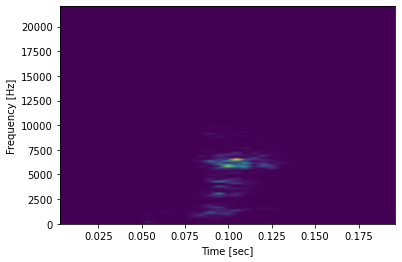

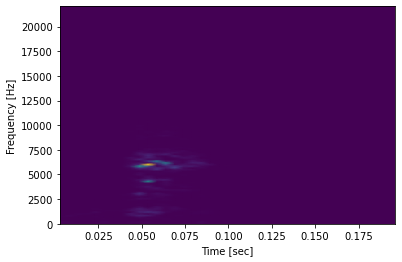

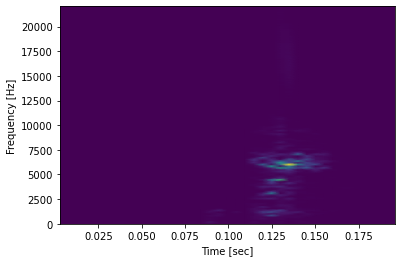

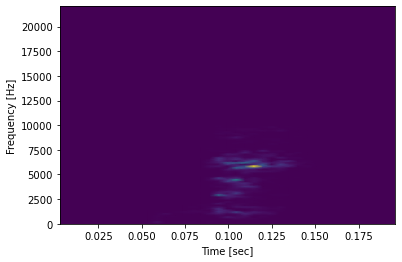

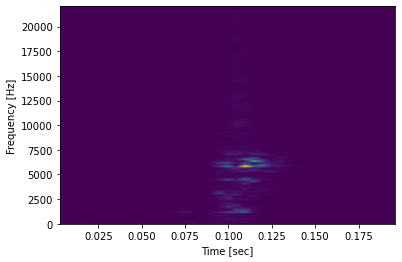

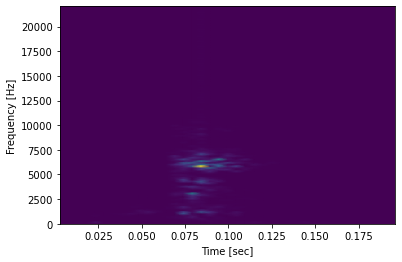

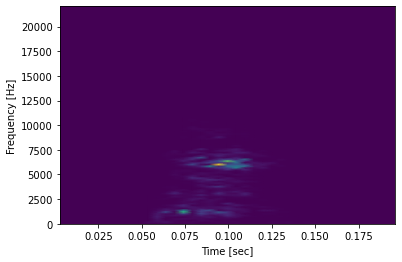

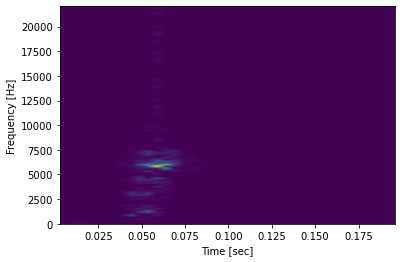

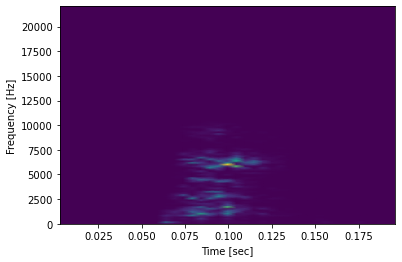

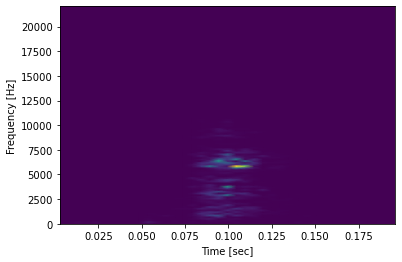

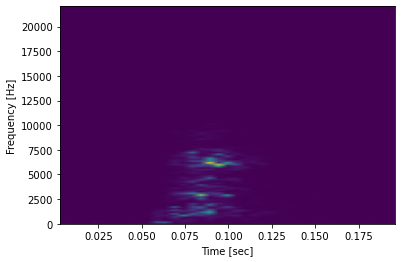

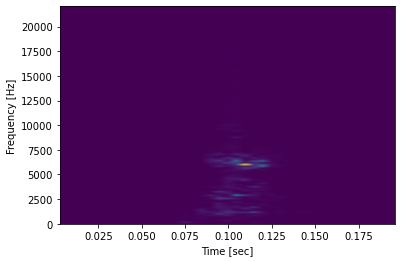

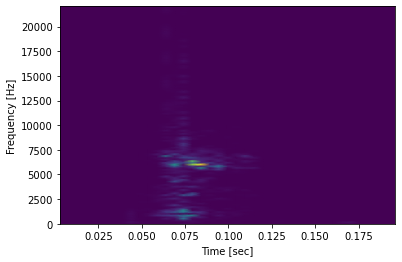

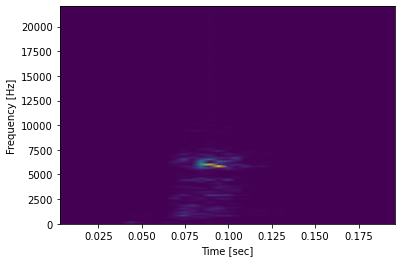

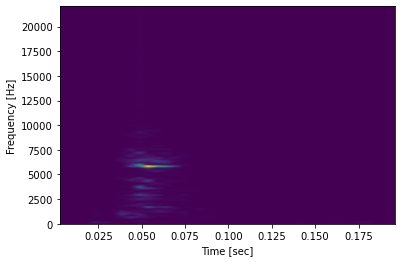

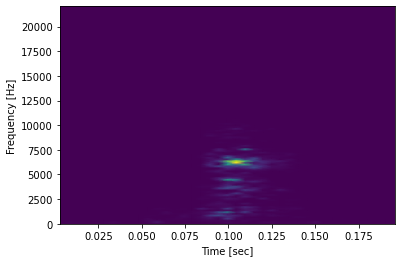

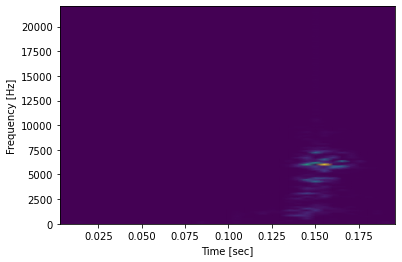

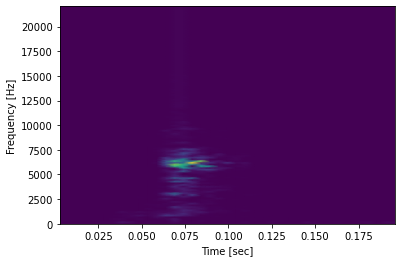

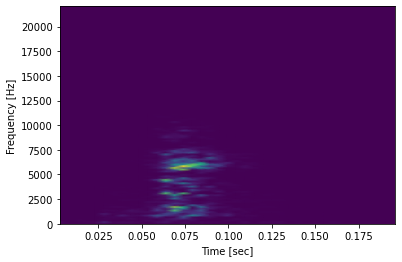

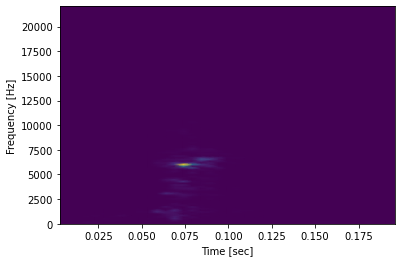

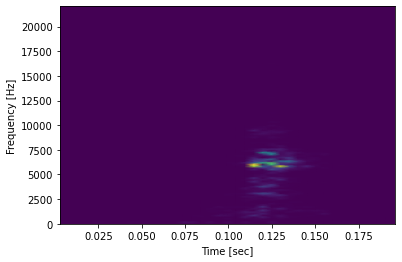

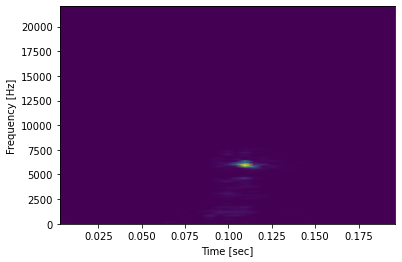

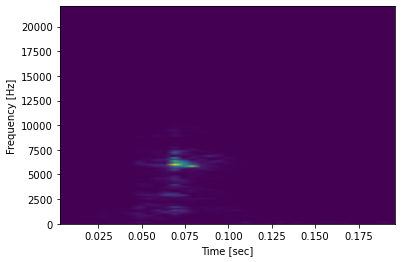

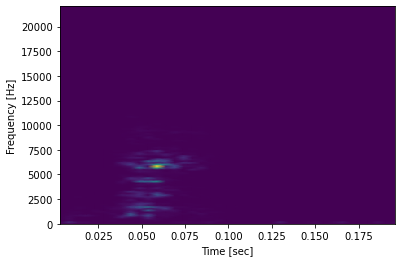

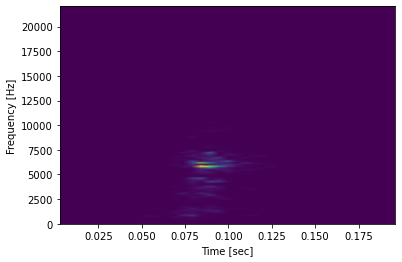

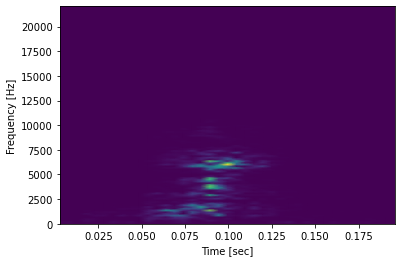

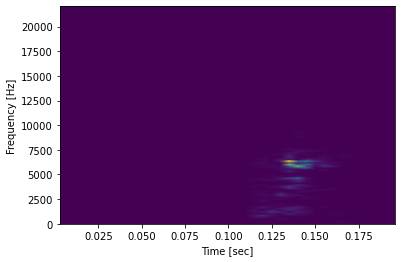

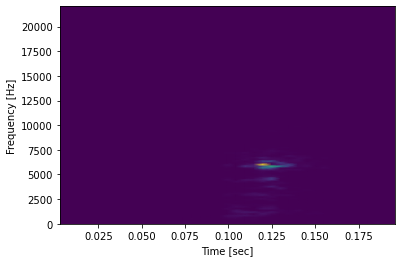

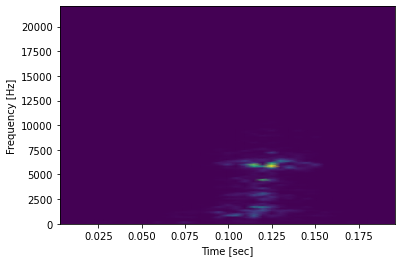

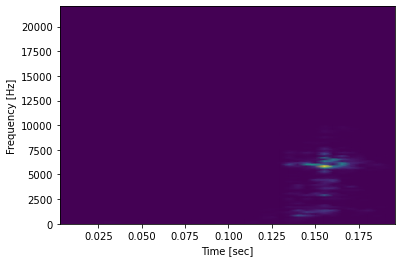

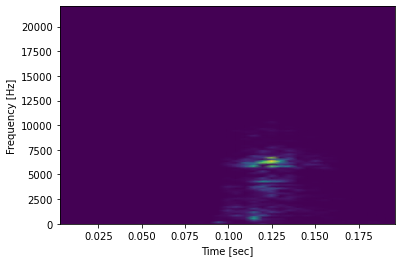

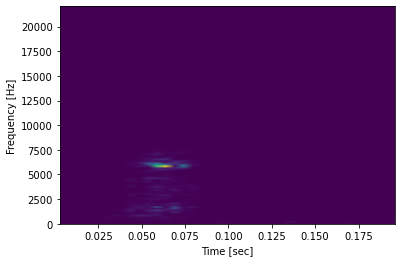

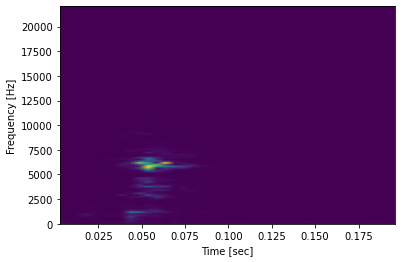

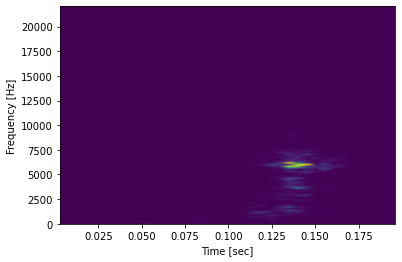

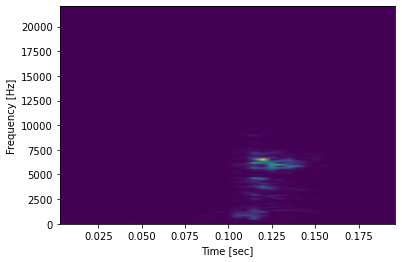

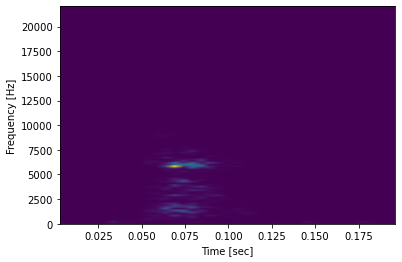

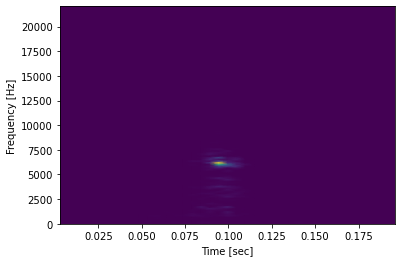

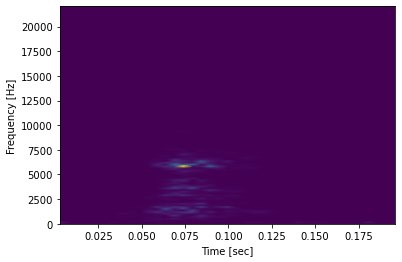

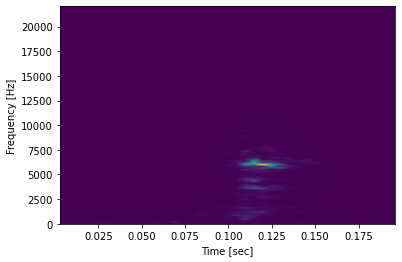

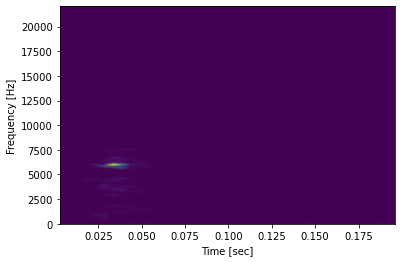

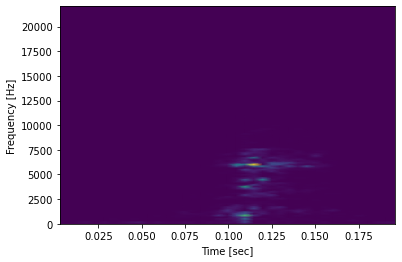

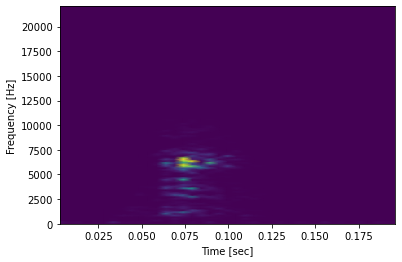

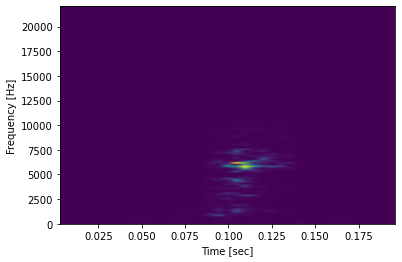

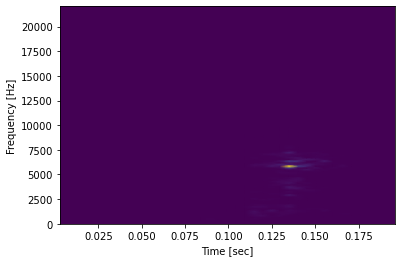

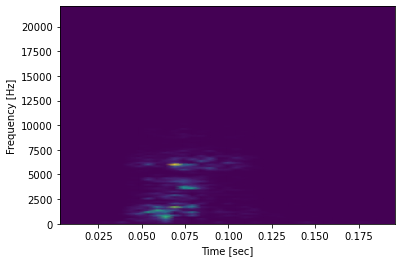

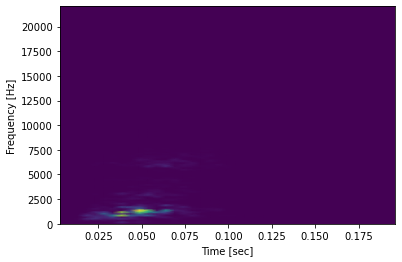

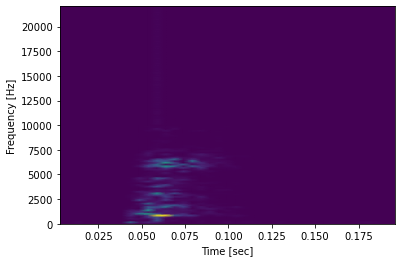

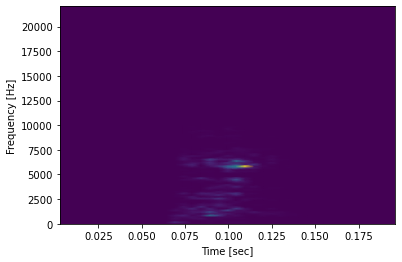

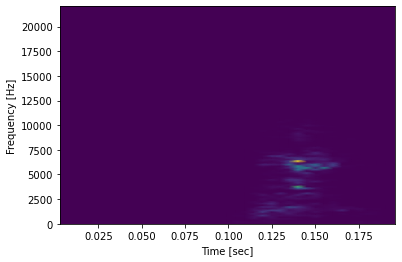

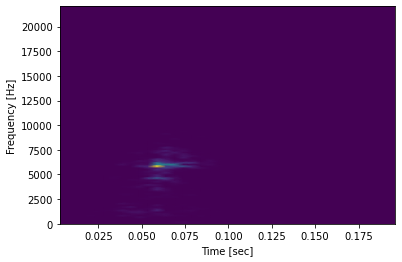

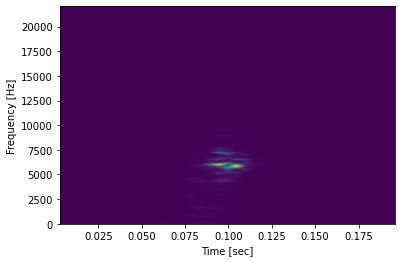

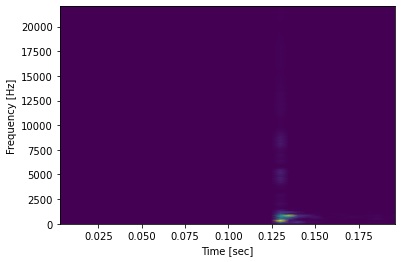

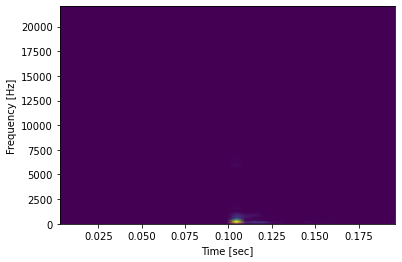

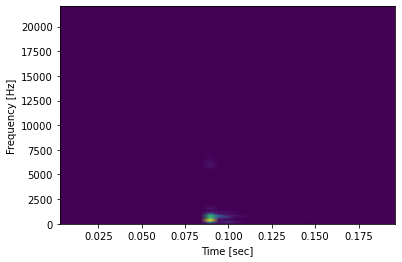

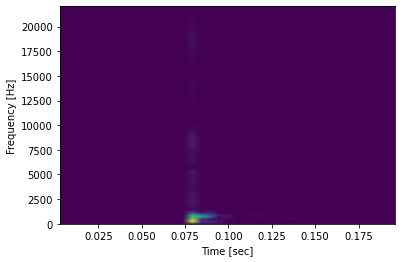

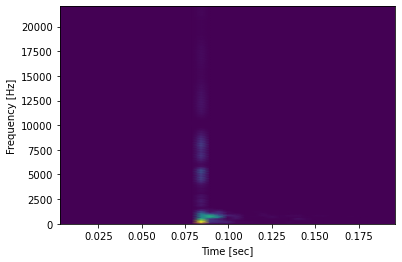

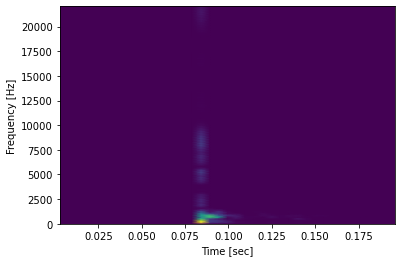

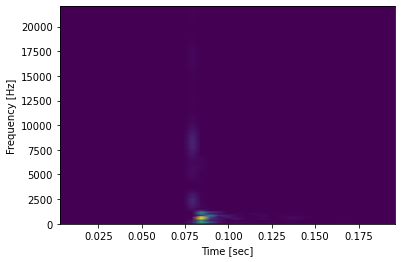

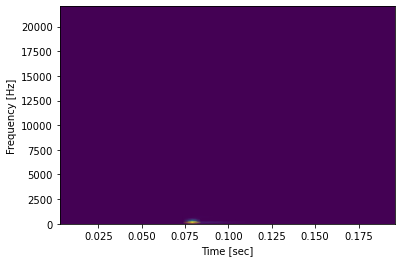

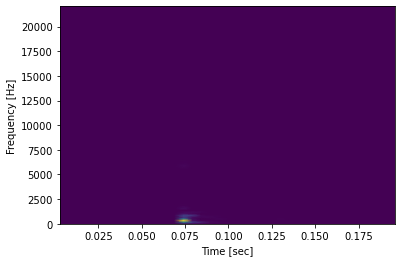

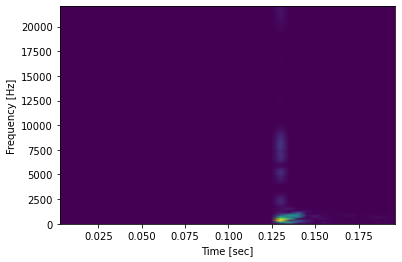

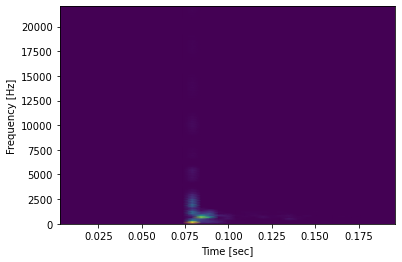

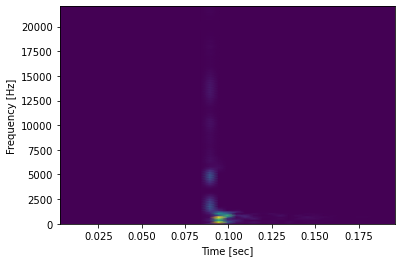

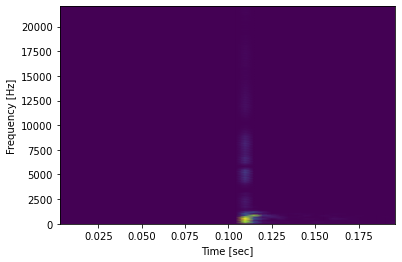

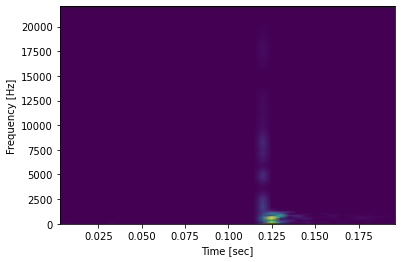

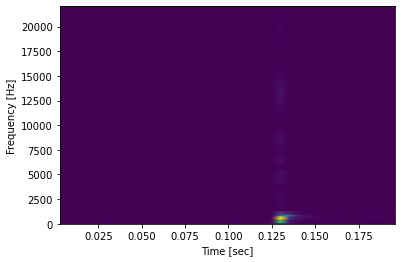

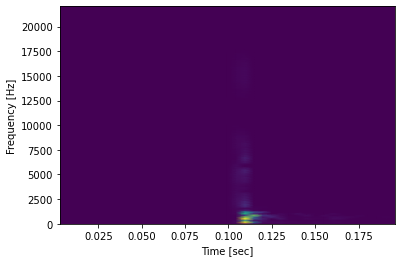

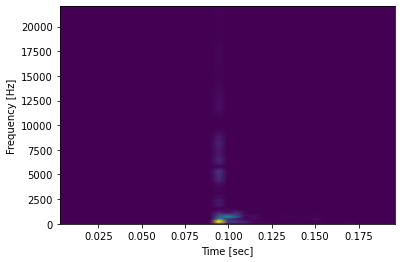

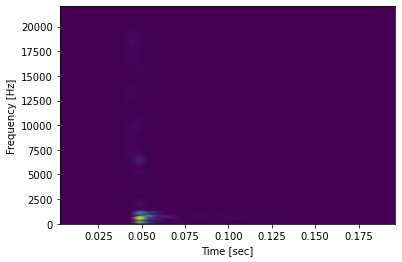

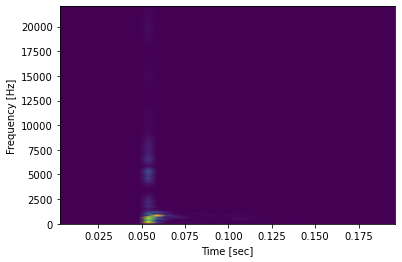

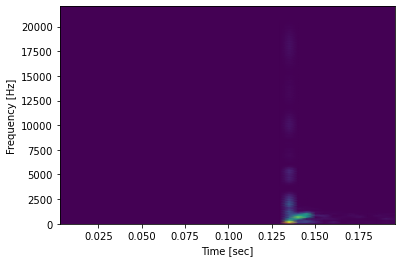

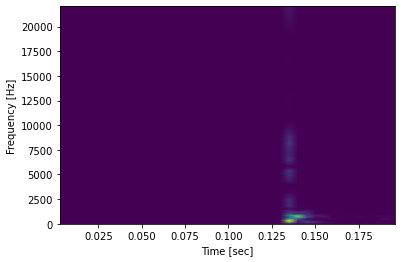

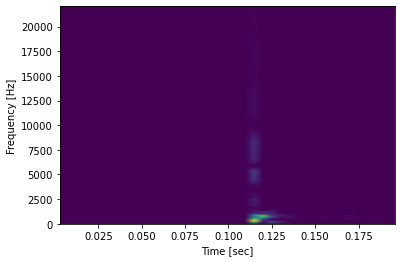

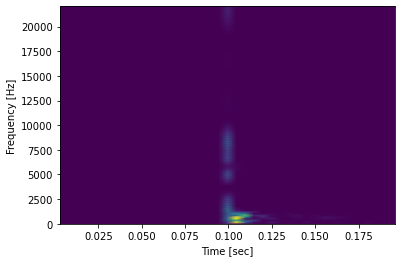

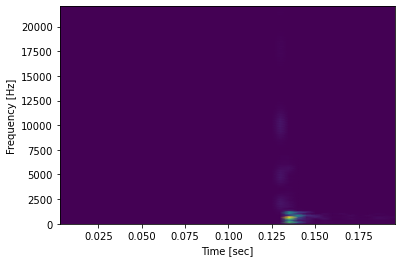

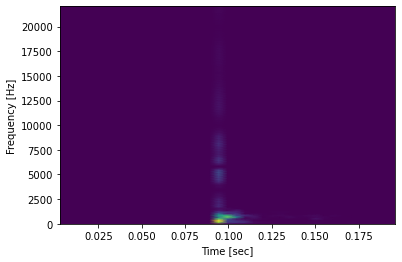

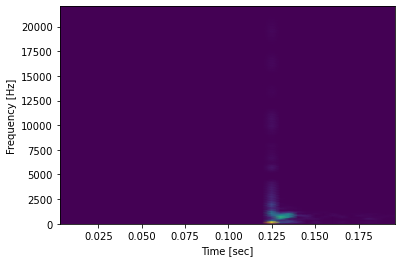

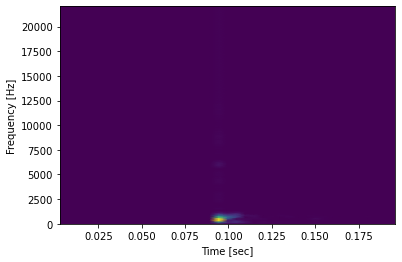

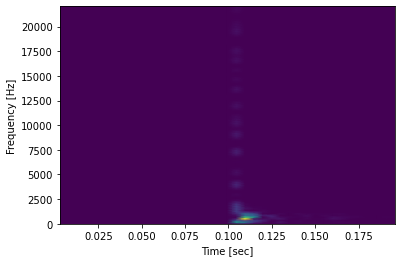

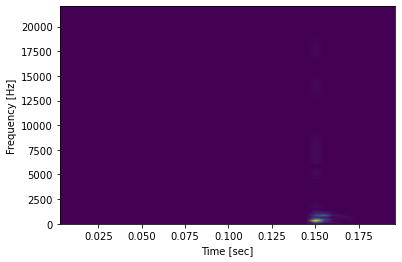

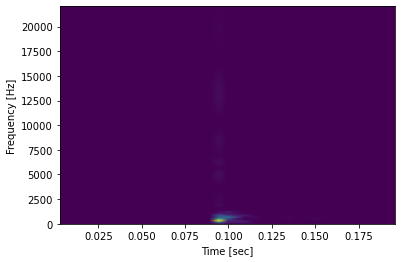

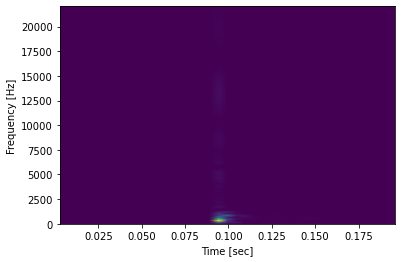

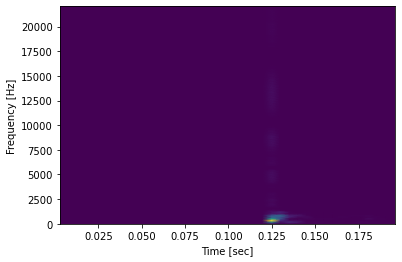

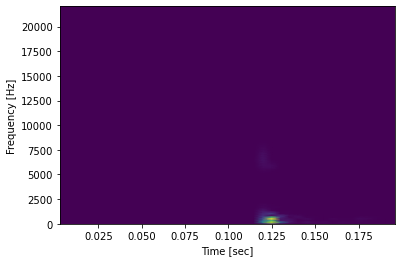

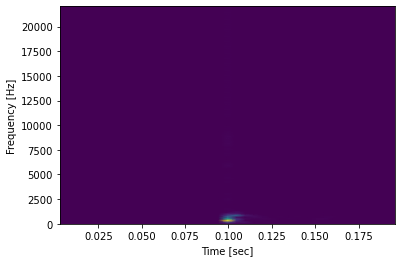

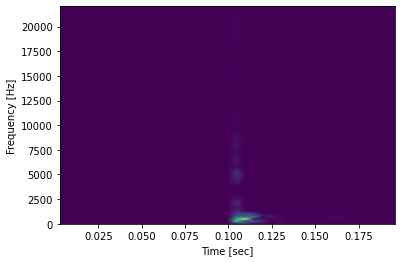

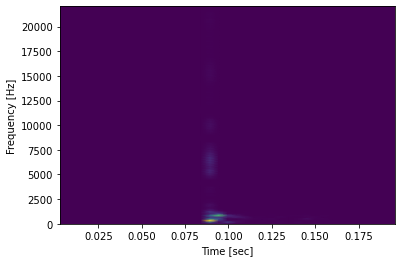

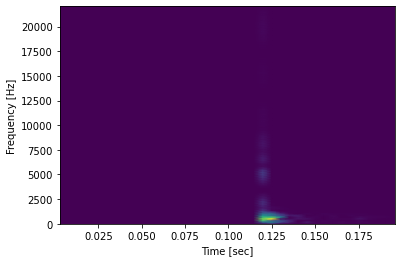

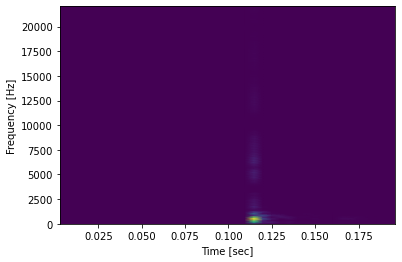

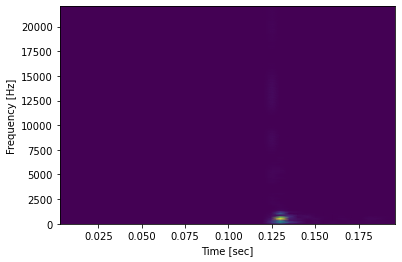

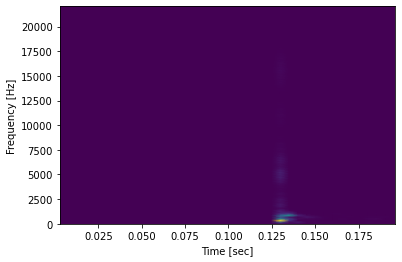

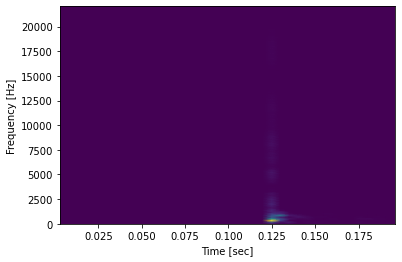

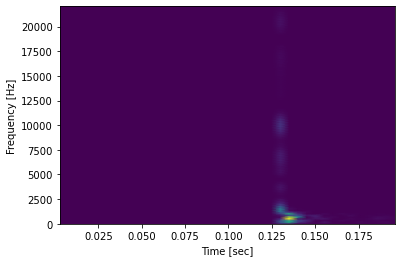

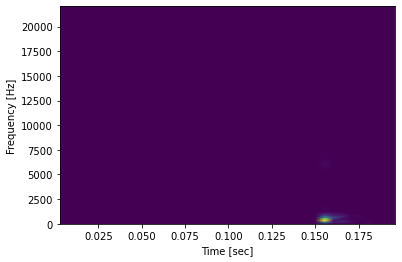

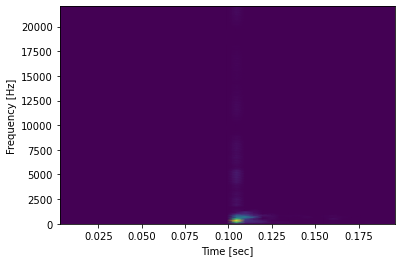

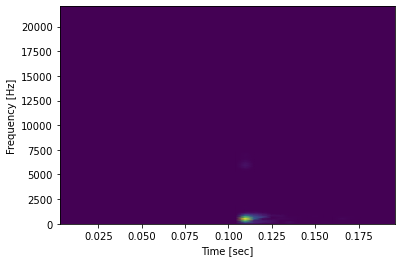

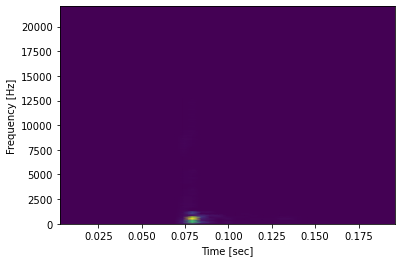

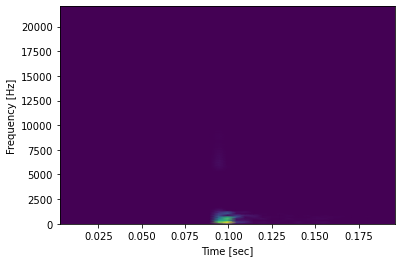

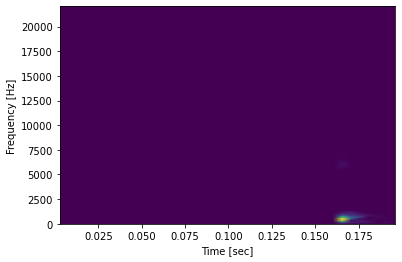

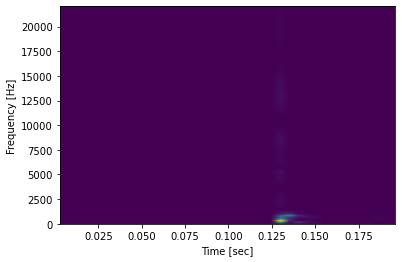

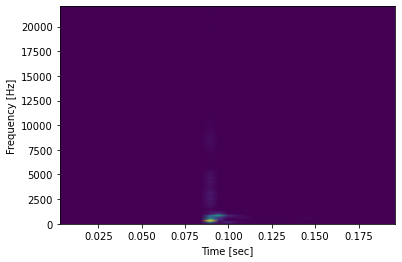

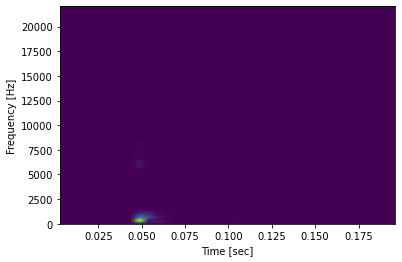

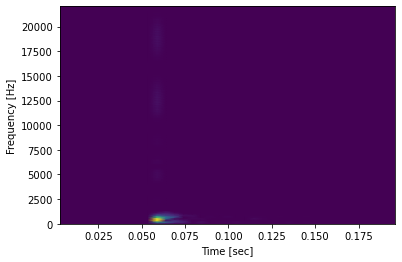

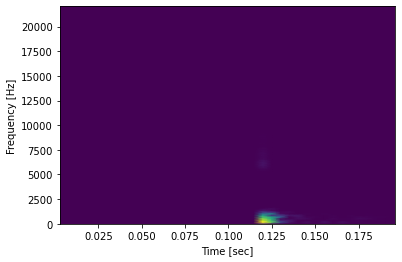

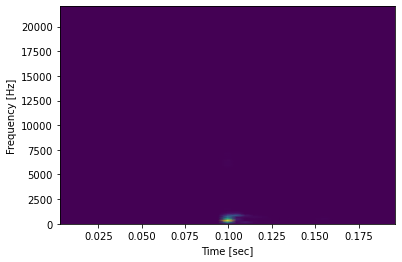

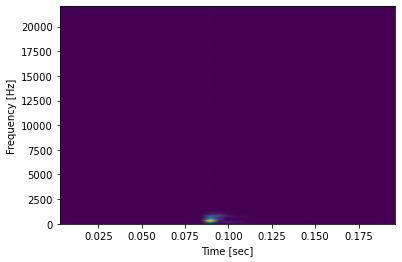

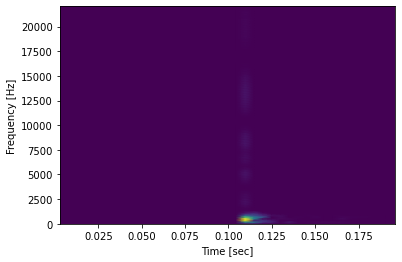

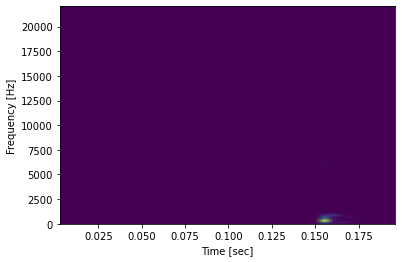

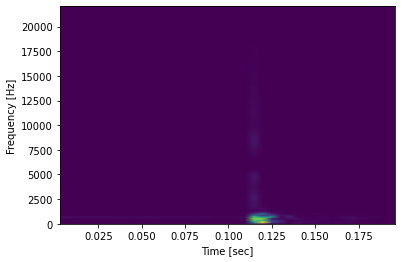

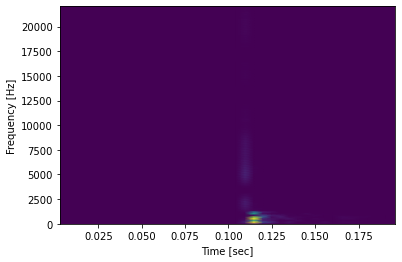

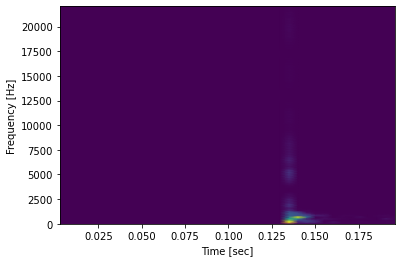

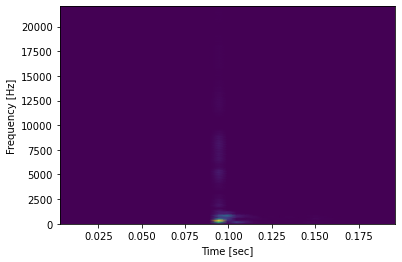

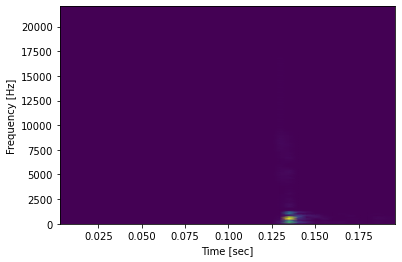

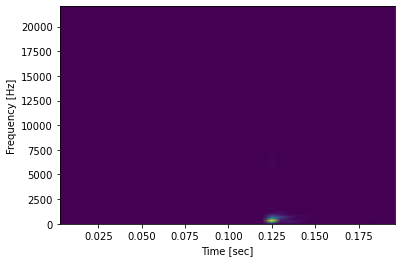

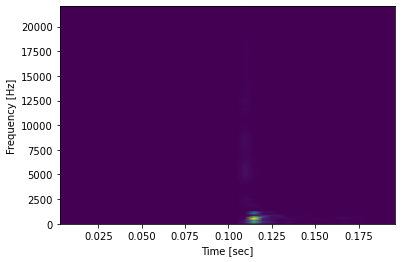

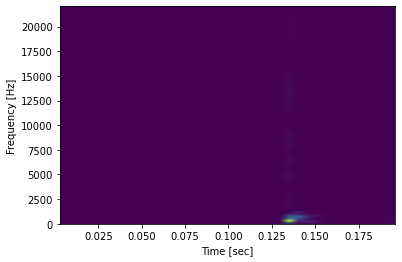

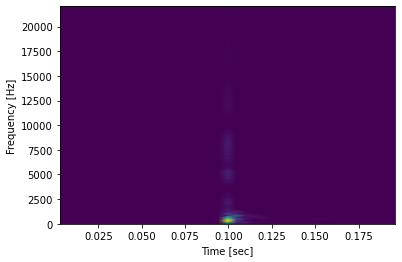

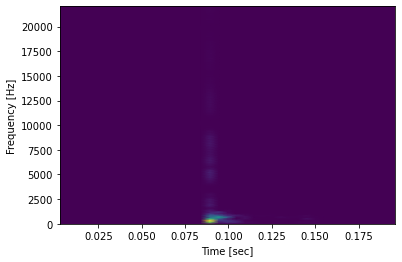

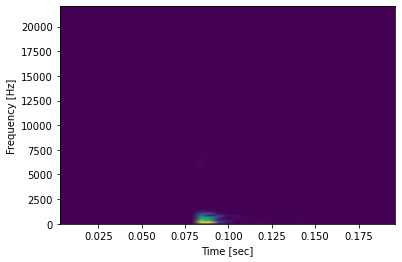

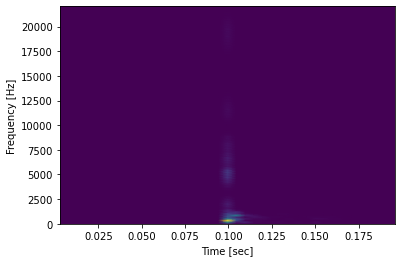

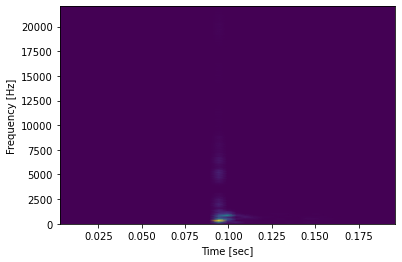

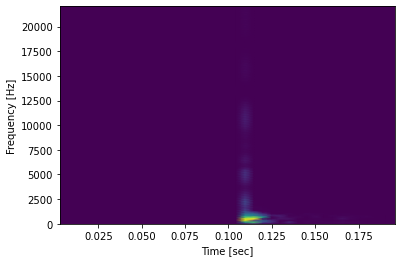

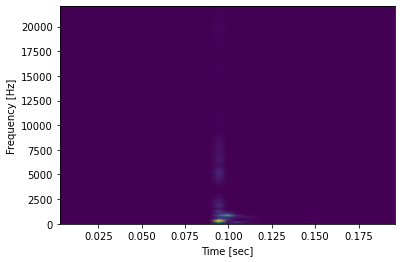

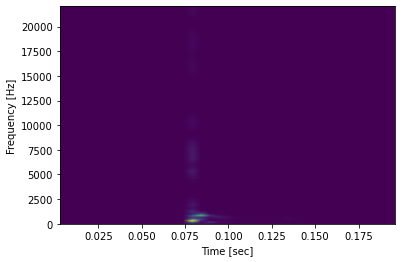

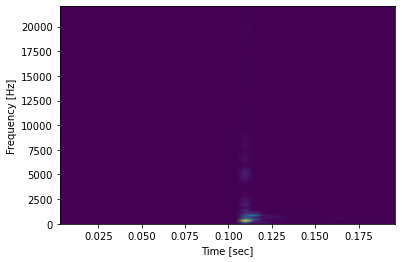

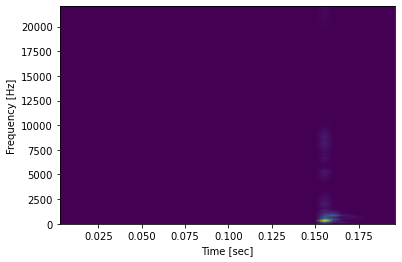

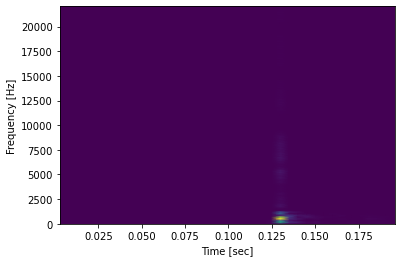

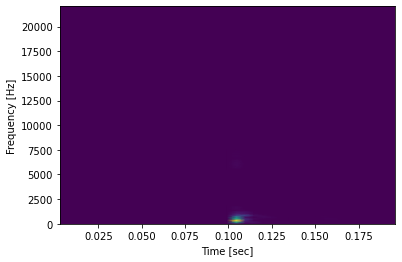

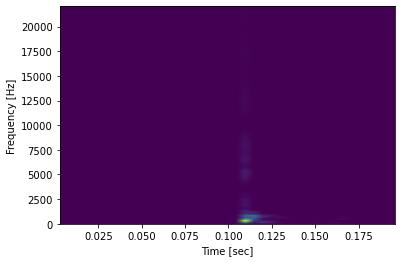

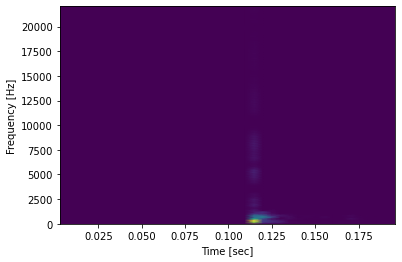

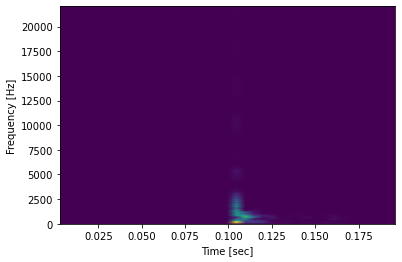

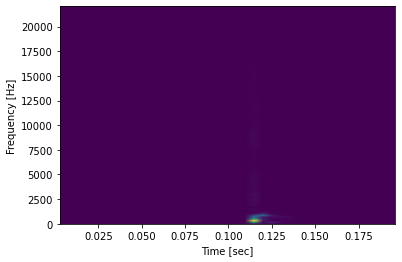

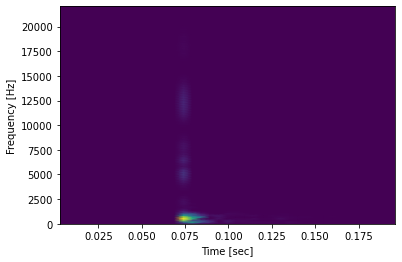

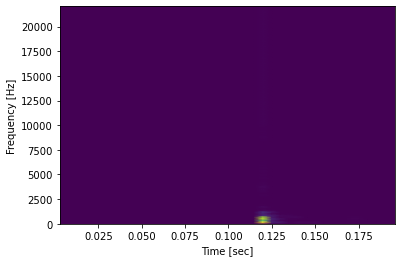

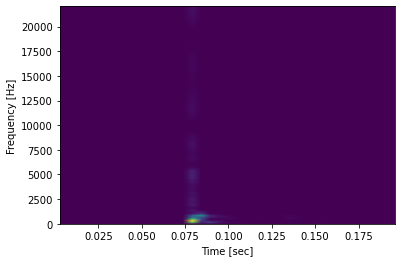

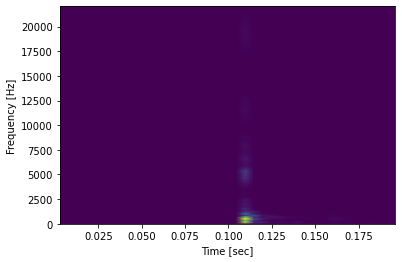

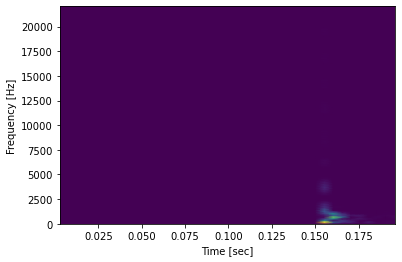

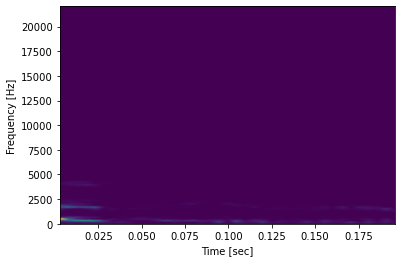

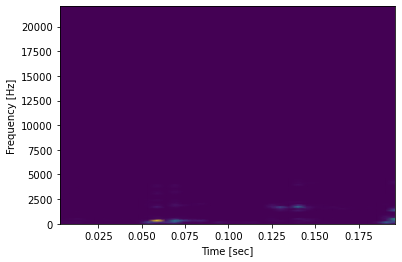

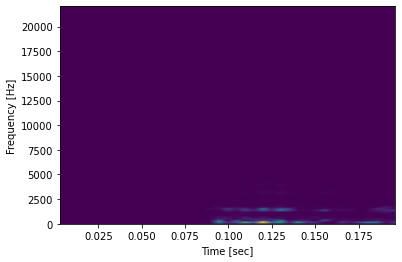

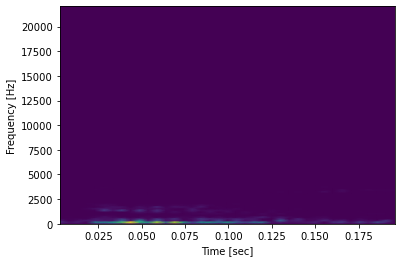

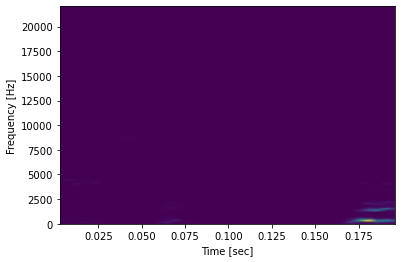

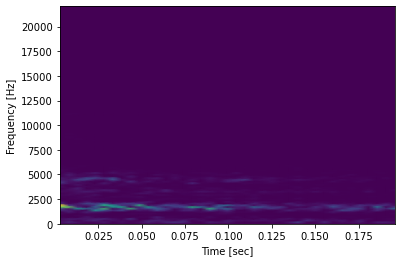

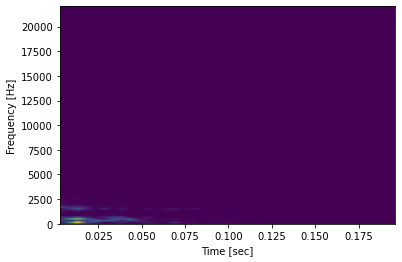

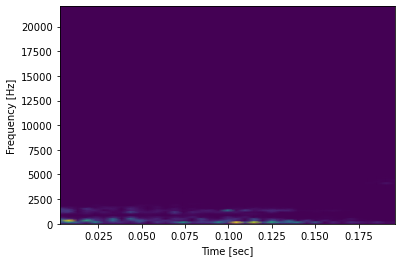

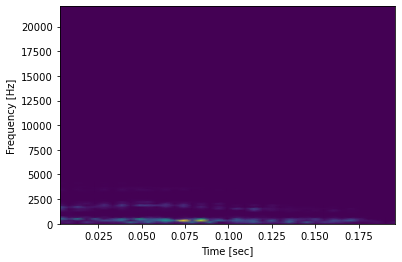

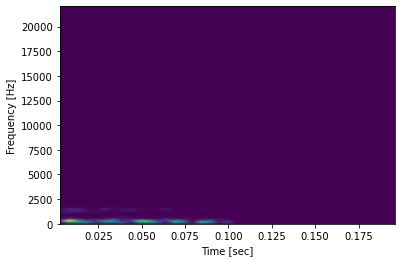

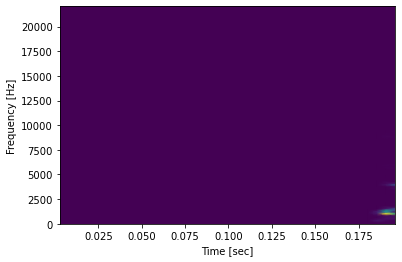

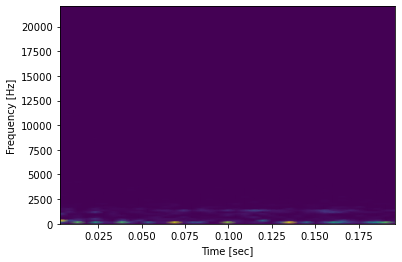

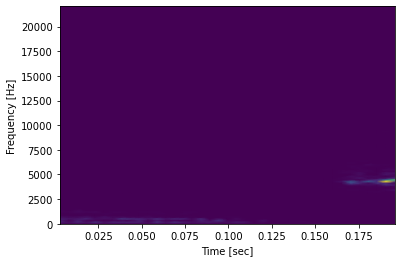

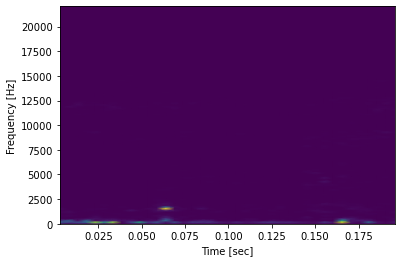

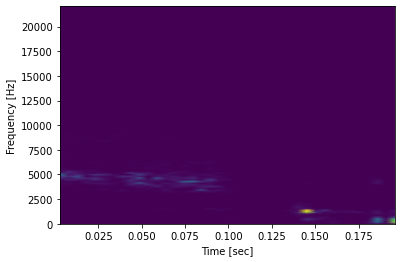

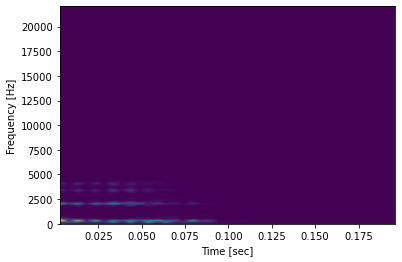

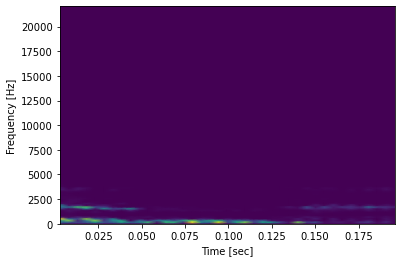

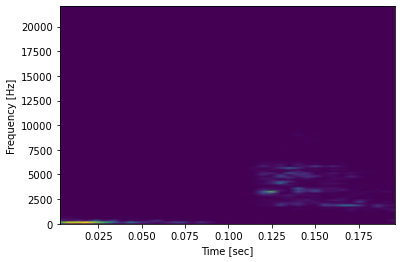

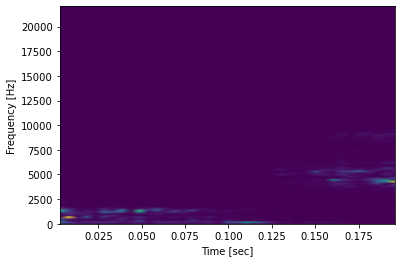

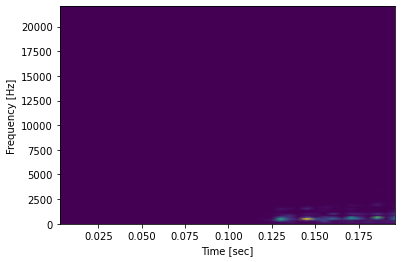

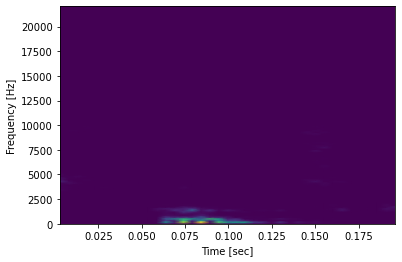

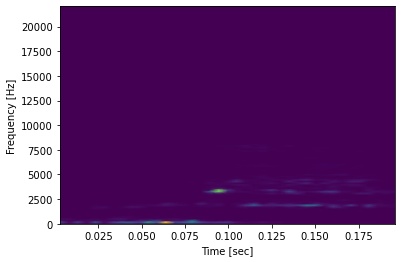

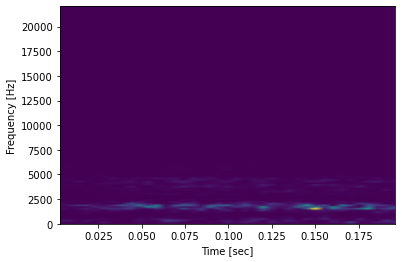

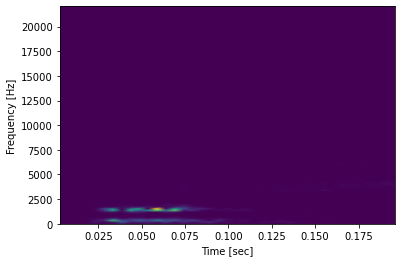

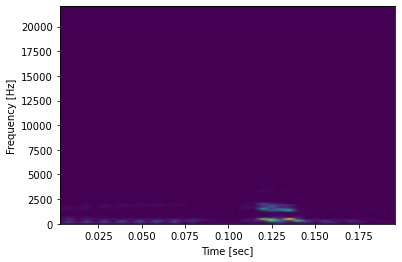

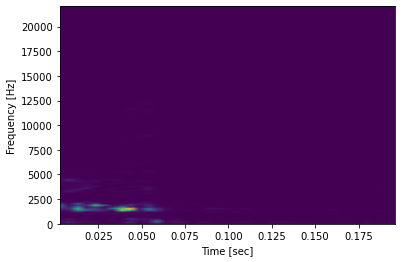

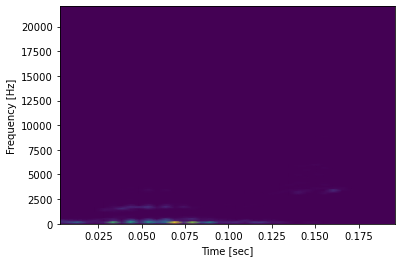

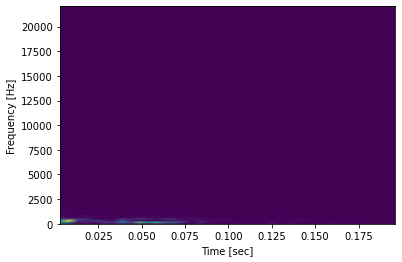

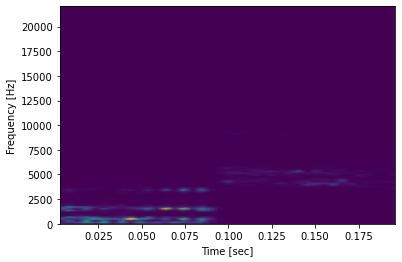

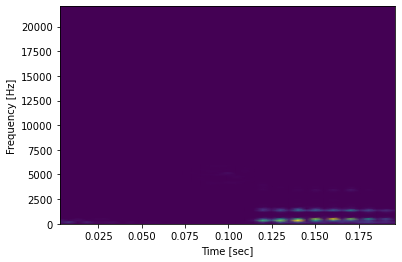

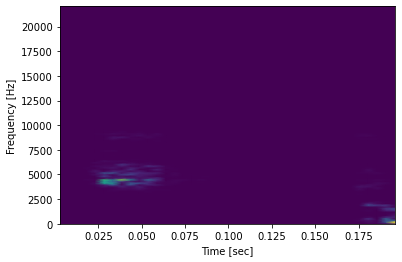

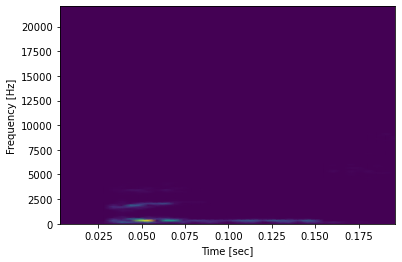

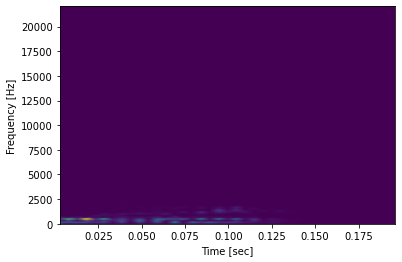

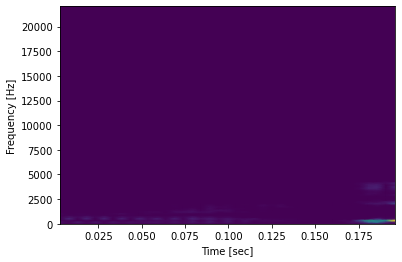

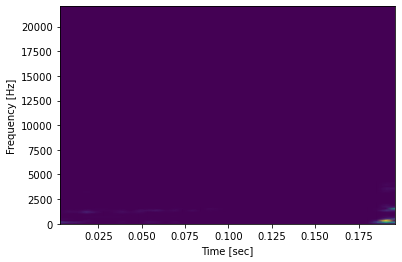

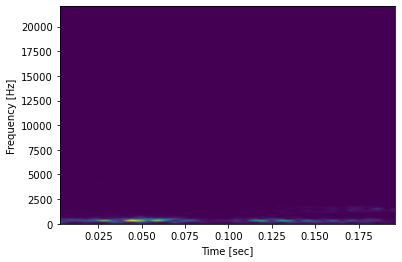

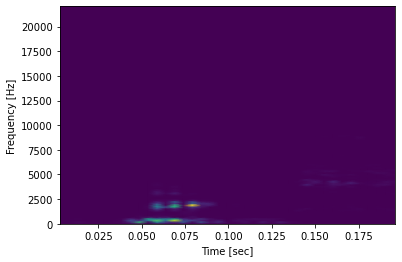

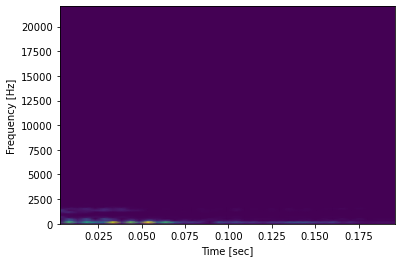

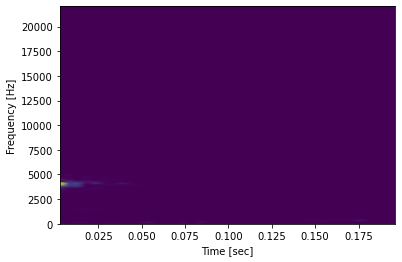

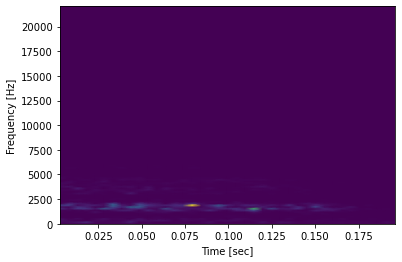

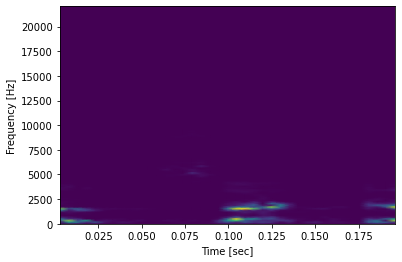

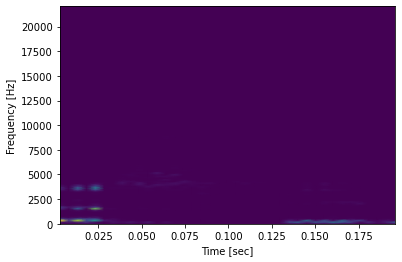

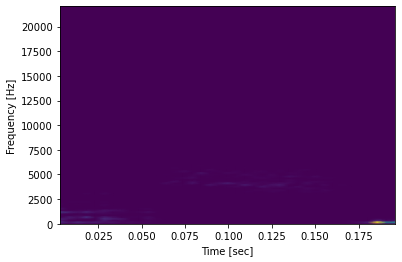

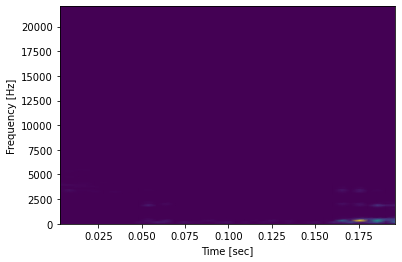

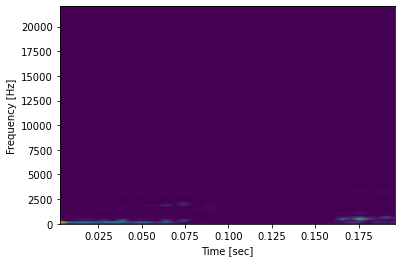

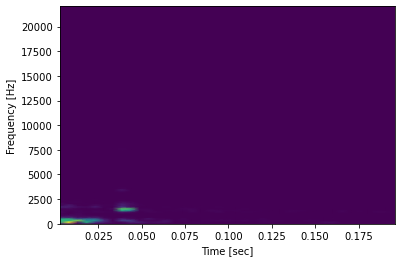

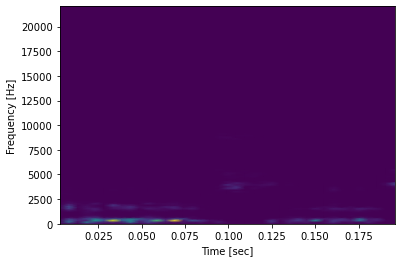

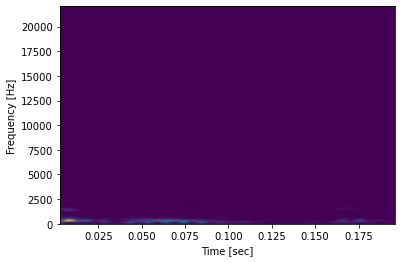

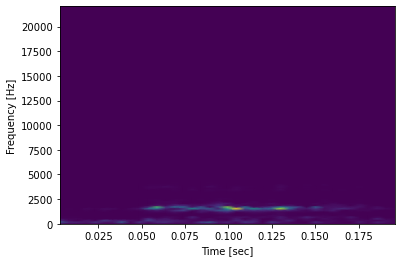

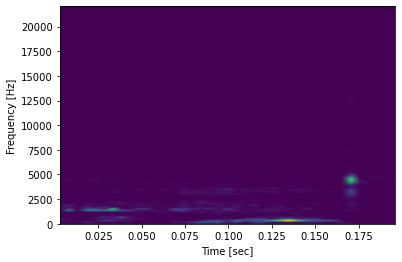

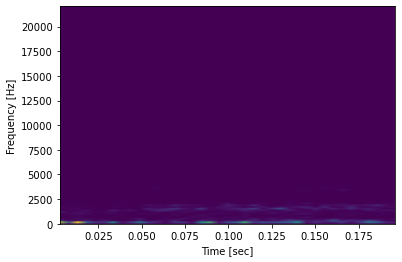

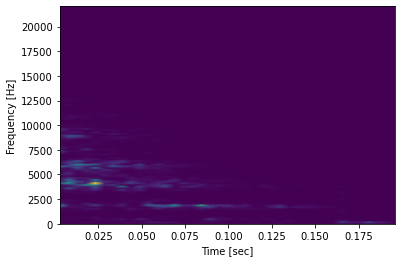

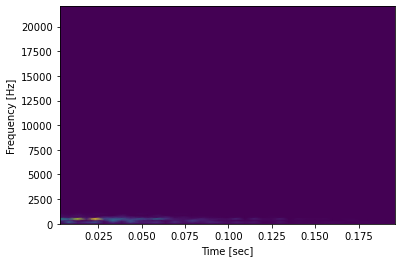

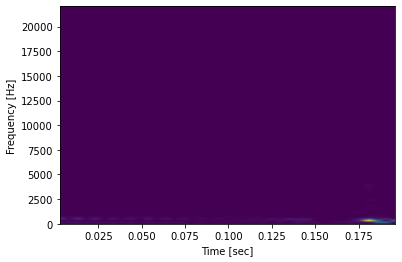

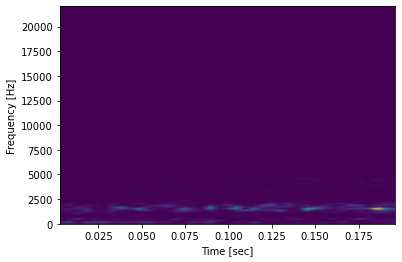

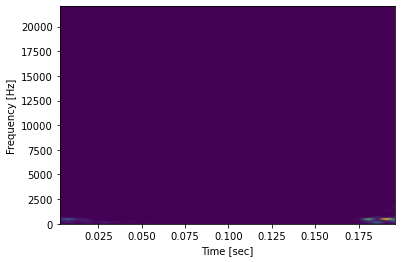

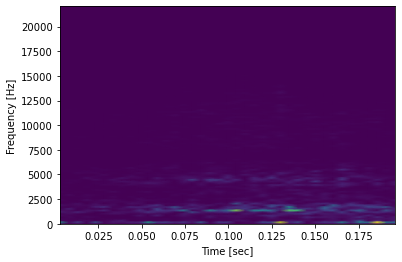

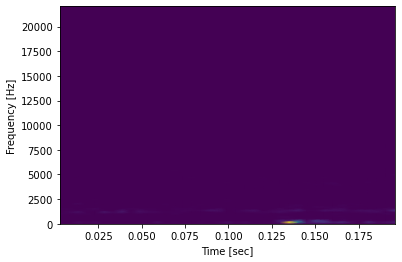

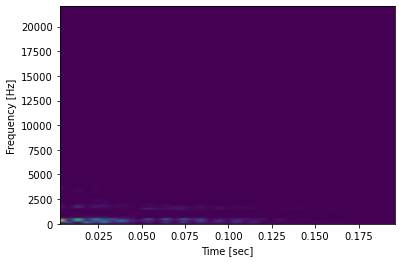

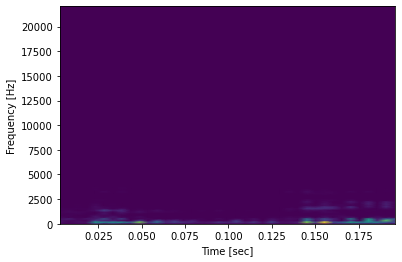

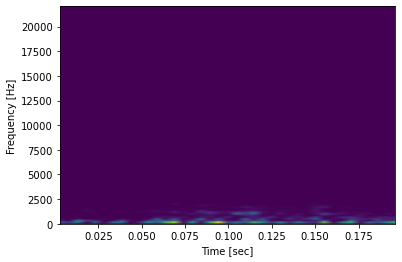

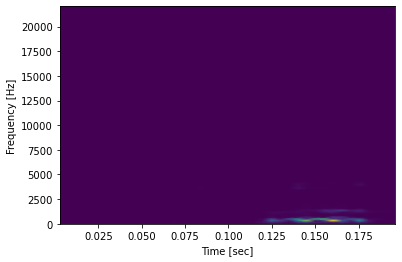

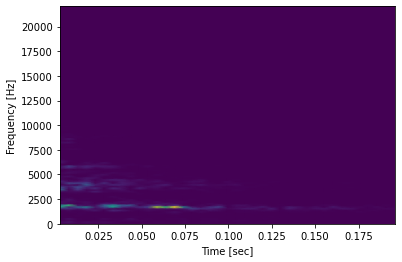

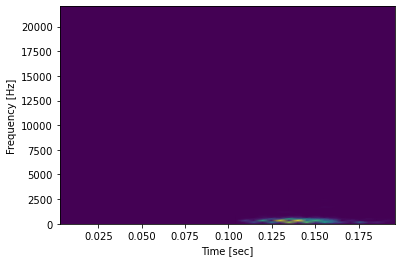

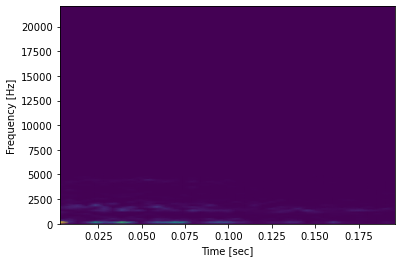

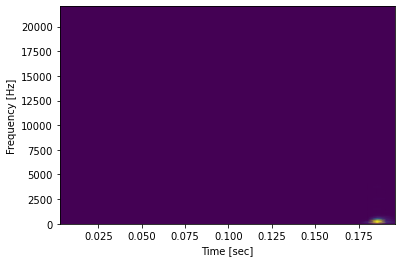

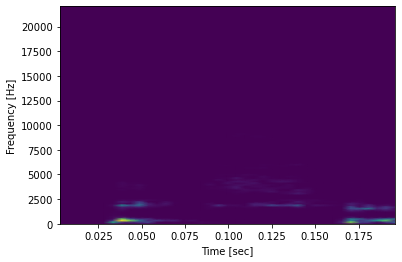

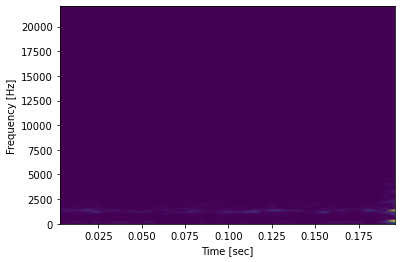

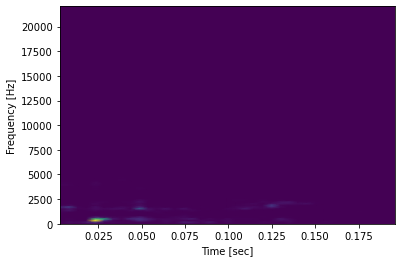

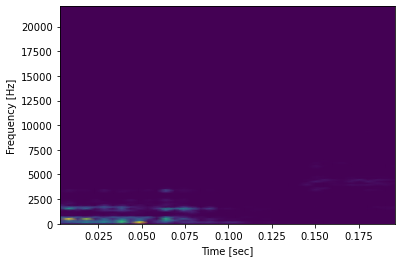

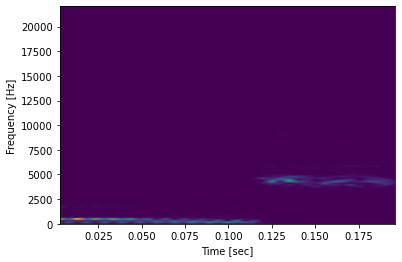

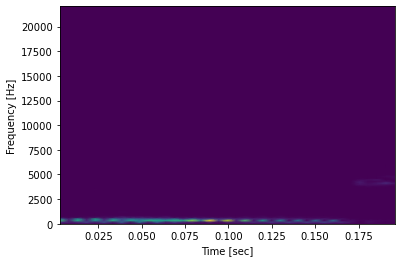

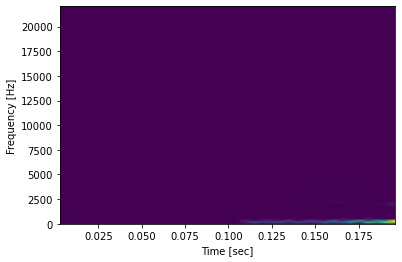

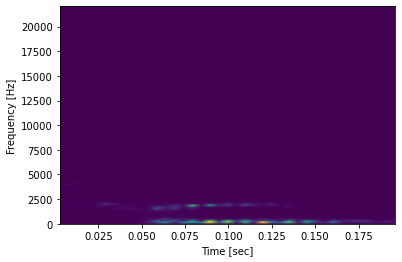

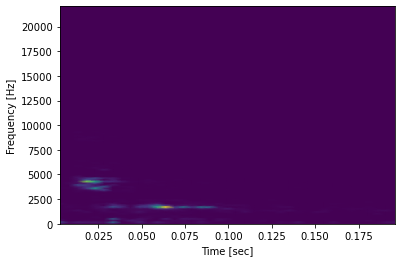

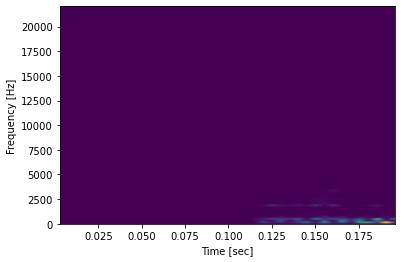

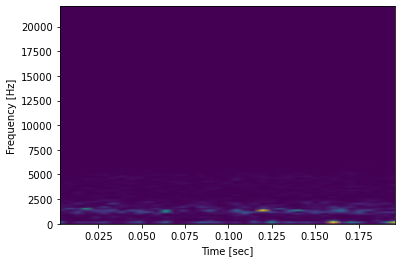

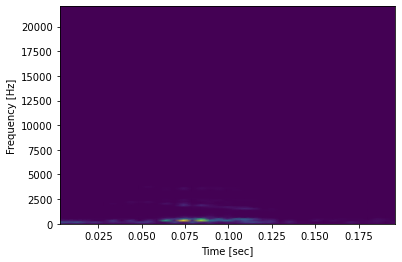

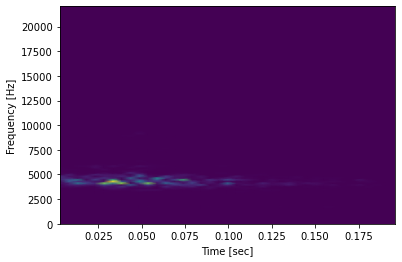

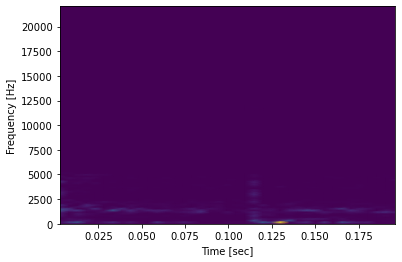

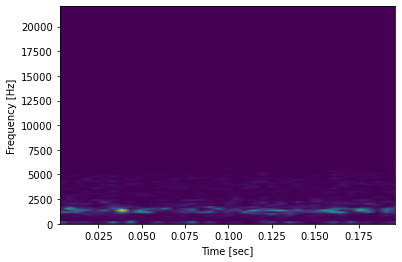

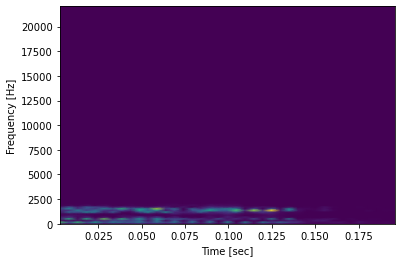

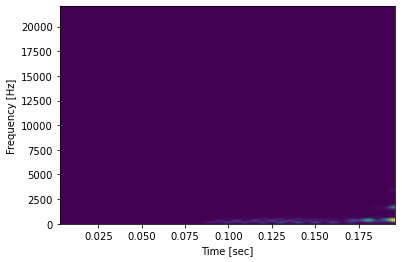

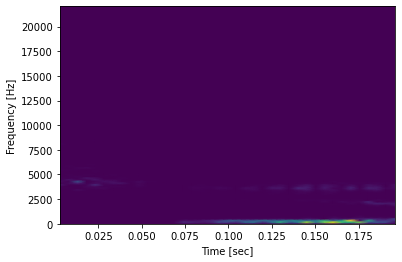

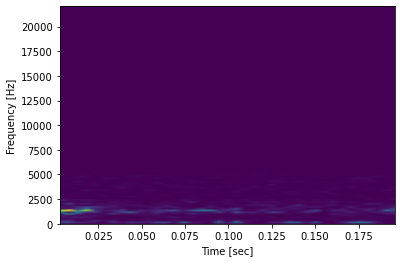

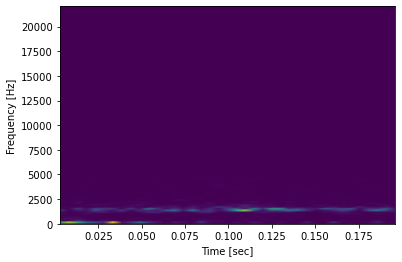

In [46]:
scratch_spec = get_spectrum_dataset('raw_data/Scratches_01.wav', pad=0.4)
tap_spec = get_spectrum_dataset('raw_data/Taps_01.wav', pad=0.4)
rose_spec = get_spectrum_dataset('raw_data/Rose_01.wav', pad=0.4)

(86, 129, 39)

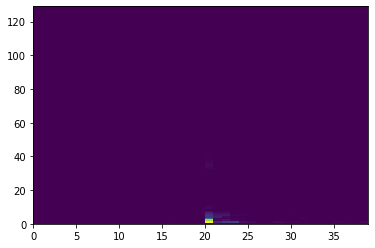

In [43]:
plt.imshow(scratch_spec[:,:,:])

In [ ]:
plt.pcolormesh(tap_spec[1])
scratch_spec = np.asarray(scratch_spec)
scratch_spec.shape